In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
num_folds = 5
dates = np.genfromtxt('../wofs_phi/probSevere_dates.txt')

num_dates = len(dates)
indices = np.arange(num_dates)
splits = np.array_split(indices, num_folds)
chunk_splits = []
for i in range(len(splits)):
    split = splits[i]
    chunk_splits.append(split[0])
chunk_splits.append(num_dates)
date_test_folds = []
date_val_folds = []
date_train_folds = []
if num_folds == 1:
    date_test_folds = [dates]
    date_val_folds = [dates]
    date_train_folds = [dates]
    quit()
for i in range(num_folds):
    if i == 0:
        date_test_folds.append(dates[chunk_splits[i]:chunk_splits[i+1]])
        date_val_folds.append(dates[chunk_splits[-2]:chunk_splits[-1]])
        date_train_folds.append(dates[chunk_splits[i+1]:chunk_splits[i+1+(num_folds-2)]]) #fold 0: 1-3
    elif i == num_folds - 1:
        date_test_folds.append(dates[chunk_splits[i]:chunk_splits[-1]])
        date_val_folds.append(dates[chunk_splits[i-1]:chunk_splits[i]])
        date_train_folds.append(dates[chunk_splits[0]:chunk_splits[num_folds-2]]) #fold 4: 0-2
    elif (i+1+(num_folds-2)) > (num_folds):
        date_test_folds.append(dates[chunk_splits[i]:chunk_splits[i+1]])
        date_val_folds.append(dates[chunk_splits[i-1]:chunk_splits[i]])
        train_folds = list(dates[chunk_splits[i+1]:chunk_splits[-1]])
        train_folds.extend(dates[chunk_splits[0]:chunk_splits[i-1]])
        date_train_folds.append(train_folds)
        #fold 1: 2,3,4
        #fold 2: 3,4,0
        #fold 3: 4,0,1
    else:
        date_test_folds.append(dates[chunk_splits[i]:chunk_splits[i+1]])
        date_val_folds.append(dates[chunk_splits[i-1]:chunk_splits[i]])
        date_train_folds.append(dates[chunk_splits[i+1]:chunk_splits[i+1+(num_folds-2)]])


In [57]:
train_folds = np.array([[1,2,3], [2,3,4], [3,4,0], [4,0,1], [0,1,2]])
fold_event_climos = []
for i in range(5):
    print(i)
    num_fold_events = 0
    fold_event_area = 0
    for train_fold in [i]:
        print('x')
        fdir = '/work/ryan.martz/wofs_phi_data/obs_and_warnings_train/test_fcsts/wofs_psv3_with_torp/tornado/wofslag_25/length_60/fold%s/'\
        %(train_fold)
        fname = 'all_tornado_obs_and_warnings_30-90min_r39km_fold%s.npy' %(train_fold)
        fold_events = np.load('%s/%s' %(fdir, fname))
        num_fold_events += np.sum(fold_events)
        fold_event_area += (fold_events.size/90000)*(900*900)
    fold_event_climo = num_fold_events/fold_event_area
    fold_event_climos.append(fold_event_climo)
fold_event_climos = np.array(fold_event_climos)

0
x
1
x
2
x
3
x
4
x


In [37]:
train_folds = np.array([[1,2,3], [2,3,4], [3,4,0], [4,0,1], [0,1,2]])
fold_event_climos_2hr = []
for i in range(5):
    print(i)
    num_fold_events = 0
    fold_event_area = 0
    for train_fold in train_folds[i]:
        print('x')
        fdir = '/work/ryan.martz/wofs_phi_data/obs_and_warnings_train/test_fcsts/wofs_psv3_with_torp/tornado/wofslag_25/length_120/fold%s/'\
        %(train_fold)
        fname = 'all_tornado_obs_and_warnings_30-150min_r39km_fold%s.npy' %(train_fold)
        fold_events = np.load('%s/%s' %(fdir, fname))
        num_fold_events += np.sum(fold_events)
        fold_event_area += (fold_events.size/90000)*(900*900)
    fold_event_climo = num_fold_events/fold_event_area
    fold_event_climos_2hr.append(fold_event_climo)
fold_event_climos_2hr = np.array(fold_event_climos_2hr)

0
x
x
x
1
x
x
x
2
x
x
x
3
x
x
x
4
x
x
x


In [10]:
test = np.load('/work/ryan.martz/wofs_phi_data/obs_and_warnings_train/test_fcsts/wofs_psv2_no_torp/tornado/wofslag_25/length_60/fold2/all_tornado_obs_and_warnings_30-90min_r39km_fold2.npy')


In [12]:
test.size/90000

361.0

In [58]:
fold_event_climos*90000

array([69.91465991, 37.23532495, 19.42383513, 40.52436647, 26.19182631])

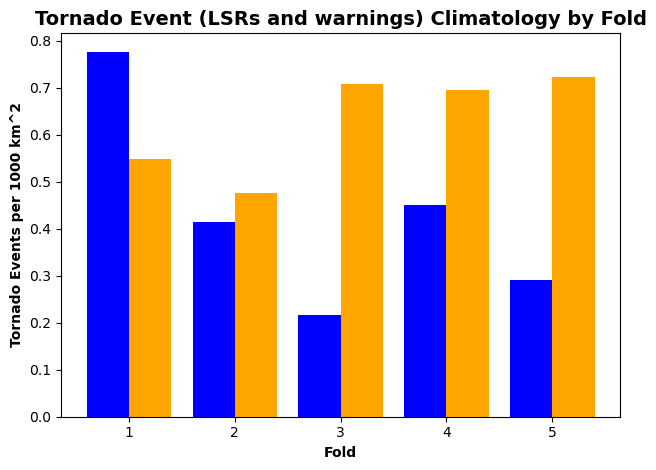

In [59]:
w, x = 0.4, np.arange(1,6)
plt.bar(x - w/2, fold_event_climos*1000, width=w, label='1-Hour', color = 'blue')
plt.bar(x + w/2, fold_event_climos_2hr*1000, width=w, label='2-Hours', color = 'orange')
plt.ylabel('Tornado Events per 1000 km^2', fontweight = 'bold', fontsize = 10)
plt.xlabel('Fold', fontweight = 'bold', fontsize = 10)
plt.title('Tornado Event (LSRs and warnings) Climatology by Fold', fontweight = 'bold', fontsize = 14)
plt.tight_layout()

In [ ]:
start_times = ["1730", "1800", "1830", "1900", "1930", "2000", "2030", "2100",\
               "2130", "2200", "2230", "2300", "2330", "0000", "0030", "0100",\
               "0130", "0200", "0230", "0300", "0330", "0400", "0430", "0500",\
               "0530"]
end_times_1hr = ["1830", "1900", "1930", "2000", "2030", "2100", "2130", "2200",\
               "2230", "2300", "2330", "0000", "0030", "0100", "0130", "0200",\
               "0230", "0300", "0330", "0400", "0430", "0500", "0530", "0600",\
               "0630"]
dates = np.genfromtxt('../wofs_phi/probSevere_dates.txt')

torp_dir = '/work/eric.loken/wofs/2024_update/SFE2024/fcst/full_npy'

for fold in range(5):
    fold_dates = date_train_folds
    for date in fold_dates:
        for i in range(len(start_times)):
            

file_ex = 'wofs1d_psv3_with_torp_20190430_2100_2124_v2130-2230.npy'

In [2]:
torp_dir = '/work/eric.loken/wofs/2024_update/SFE2024/fcst/full_npy'
file_ex = 'wofs1d_psv3_with_torp_20190430_2100_2124_v2130-2230.npy'
test = np.load('%s/%s' %(torp_dir, file_ex))

In [5]:
test.shape[0]

90000

In [8]:
test[[0,2]].shape

(2, 374)